In [1]:
import json
from six.moves import cPickle as pickle
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [2]:
# captions = json.load(open('data/coco/captions_bootstrap_baseline_s5_corr.json', 'r'))
captions = pickle.load(open('data/coco/captions_bootstrap_baseline_genconf15.pkl', 'rb'))

In [3]:
captions[0]

{'bleu4': [0.9999999998203284,
  0.9999999998479232,
  0.9999999998479232,
  0.9999999998023361,
  0.9999999998203284,
  7.751502103232945e-09,
  0.9999999997802583,
  0.7400828043459976,
  0.9999999997802583,
  0.584435646925268,
  0.6985342055045127,
  0.9999999997802583,
  0.9999999997802583,
  1.01424306725096e-08,
  0.9999999998023361,
  3.342866121054359e-05,
  9.329460217152974e-13,
  4.51801001705643e-05,
  3.7700638038042655e-05,
  5.133450479131077e-05],
 'captions': ['a long table with a flower arrangement in the middle for UNK',
  'a long table with a plant on top of it surrounded with wooden chairs',
  'a long table with a plant on top of it surrounded with wooden chairs',
  'a long table a restaurant table it wooden with blue chairs',
  'a long table with a flower arrangement in the middle for UNK',
  'a restaurant has modern wooden tables and chairs',
  'a table is adorned with wooden chairs with blue accents',
  'a long table a restaurant arrangement it the with and cha

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f466fce10>


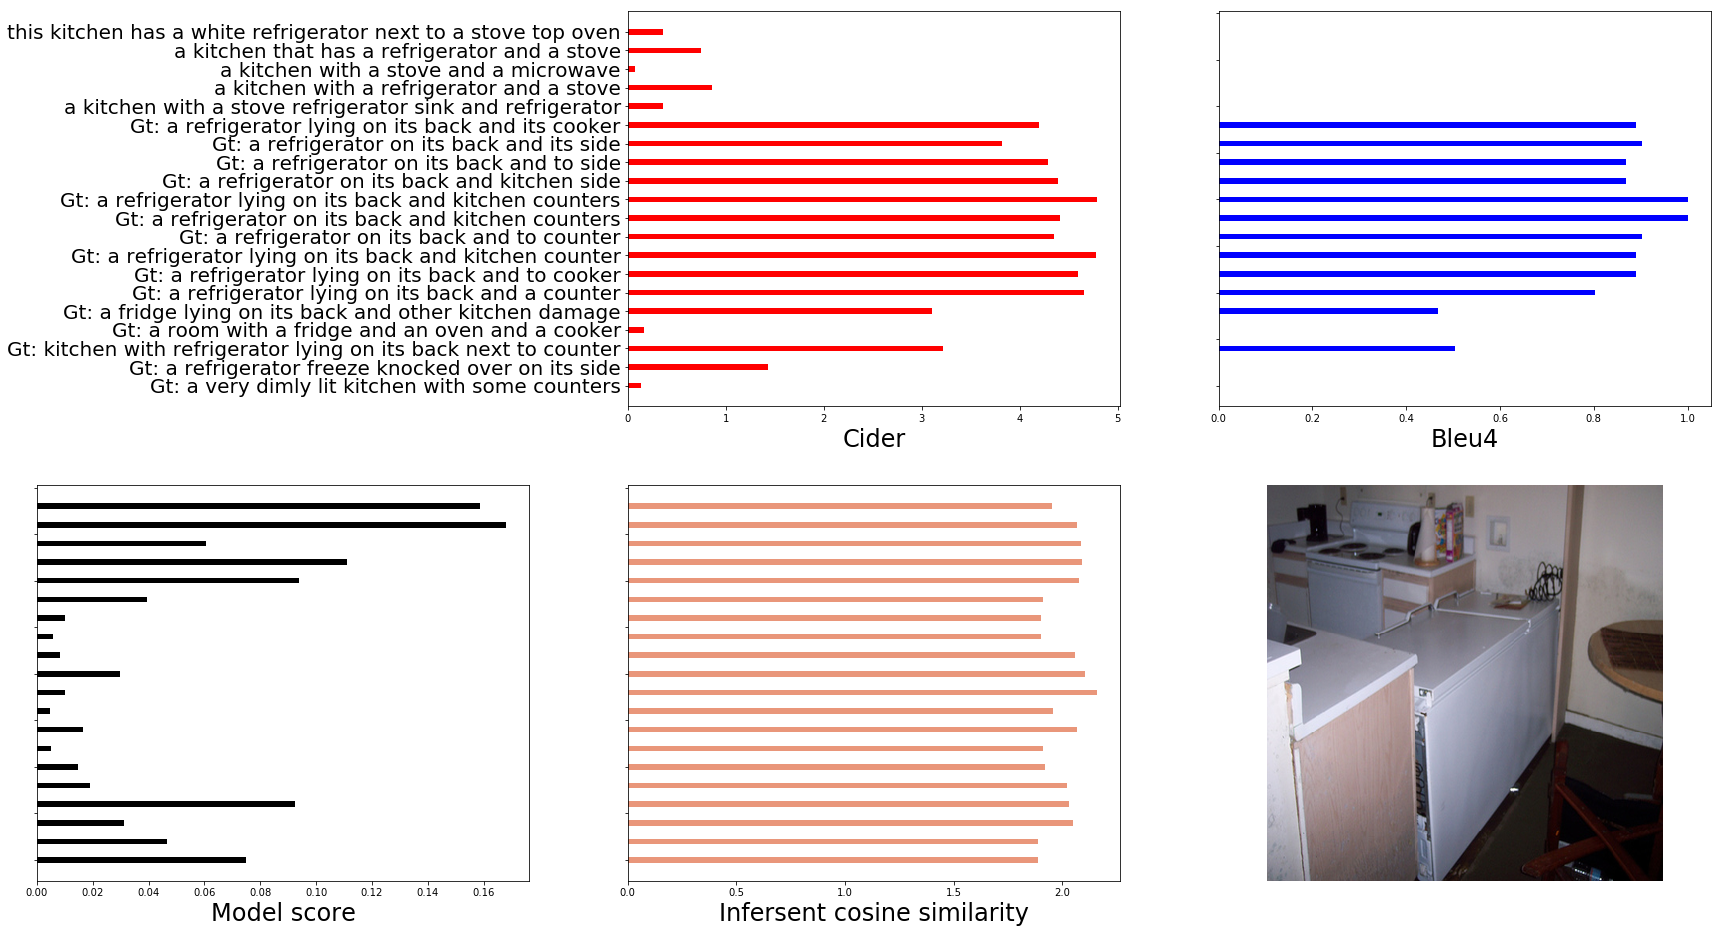

In [21]:
index = np.random.randint(len(captions))
ll = len(captions[index]['captions'])
fig, axs = plt.subplots(2, 3, figsize=(30, 16))
print(axs)
img = Image.open('data/coco/images/train2014/COCO_train2014_%012d.jpg' % captions[index]['id'])
img = img.resize((400, 400), Image.ANTIALIAS)
axs[1][2].imshow(img)
axs[1][2].axis('off')
axs[0][0].axis('off')
width = .3
source = ['Gt: '] * (ll - 5) + [''] * 5
labels = [s + c for (s, c) in zip(source, captions[index]['captions'])]
axs[0][1].barh(np.arange(ll), captions[index]['cider'], width, color='r')
axs[0][1].set_yticks(np.arange(ll))
axs[0][1].set_yticklabels(labels, fontsize=20)
axs[0][1].set_xlabel('Cider', fontsize=24)
axs[0][2].barh(np.arange(ll), captions[index]['bleu4'], width, color='b')
axs[0][2].set_xlabel('Bleu4', fontsize=24)
axs[0][2].set_yticklabels([])
axs[1][0].barh(np.arange(ll), [np.exp(s) for s in captions[index]['scores']], width, color='k')
axs[1][0].set_xlabel('Model score', fontsize=24)
axs[1][0].set_yticklabels([])
axs[1][1].barh(np.arange(ll), [np.exp(s) for s in captions[index]['infersent']], width, color='darksalmon')
axs[1][1].set_xlabel('Infersent cosine similarity', fontsize=24)
axs[1][1].set_yticklabels([])
plt.savefig('savefig/bs_%d.png' % captions[index]['id'], bbox_inches='tight')